### Movielens Case Study

Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Done with Libraries, load files

In [3]:
Movies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"])
Movies.head()

<ipython-input-3-f084df3cf9ab>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Movies = pd.read_csv("movies.dat",sep="::",names=["MovieID","Title","Genres"])


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
Ratings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"])
Ratings.head()

<ipython-input-4-5112fa121ffb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Ratings = pd.read_csv("ratings.dat",sep="::",names=["UserID","MovieID","Rating","Timestamp"])


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
Users = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"])
Users.head()

<ipython-input-5-7393d93588e4>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Users = pd.read_csv("users.dat",sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"])


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
Movies.shape

(3883, 3)

In [8]:
Ratings.shape

(1000209, 4)

In [9]:
Users.shape

(6040, 5)

Create a new dataset [Master_Data]

In [10]:
MovieRatings = Movies.merge(Ratings,on='MovieID',how='inner')
MovieRatings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [11]:
MovieRatings.shape

(1000209, 6)

In [12]:
Master = MovieRatings.merge(Users,on="UserID",how='inner')
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [13]:
#Exporting data into CSV file
Master.to_csv("Master.csv")

In [15]:
master = pd.read_csv("Master.csv")

In [16]:
#checking if exported file is working properly
master.head()

,Unnamed: 0,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


Explore the datasets using visual representations (graphs or tables)

User Age Distribution

In [17]:
Master['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

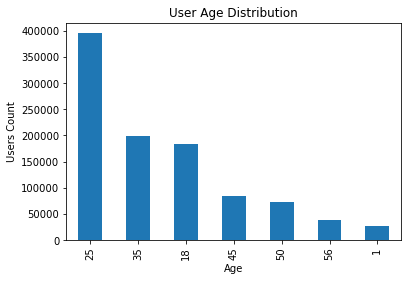

In [20]:
#Lets Plot it
Master['Age'].value_counts().plot(kind='bar')
plt.xlabel("Age")
plt.title("User Age Distribution")
plt.ylabel('Users Count')
plt.show()

User rating of the movie “Toy Story”

In [21]:
toystoryRating = Master[Master['Title'].str.contains('Toy Story') == True]
toystoryRating

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
50,3114,Toy Story 2 (1999),Animation|Children's|Comedy,1,4,978302174,F,1,10,48067
53,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008,F,50,9,55117
124,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496,M,25,12,11413
263,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952,M,25,17,61614
...,...,...,...,...,...,...,...,...,...,...
998988,3114,Toy Story 2 (1999),Animation|Children's|Comedy,3023,4,970471948,F,25,7,92108
999027,3114,Toy Story 2 (1999),Animation|Children's|Comedy,5800,5,958015250,M,35,18,90804
999486,3114,Toy Story 2 (1999),Animation|Children's|Comedy,2189,4,974607816,M,1,10,60148
999869,3114,Toy Story 2 (1999),Animation|Children's|Comedy,159,4,989966944,F,45,0,37922


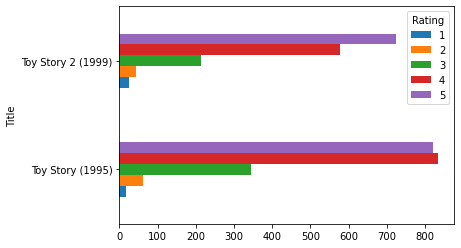

In [26]:
toystoryRating.groupby(["Title","Rating"]).size().unstack().plot(kind='barh',stacked=False,legend=True)
plt.show()

Top 25 movies by viewership rating

In [30]:
Top = Master.groupby('Title').size().sort_values(ascending=False)[:25]
Top

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

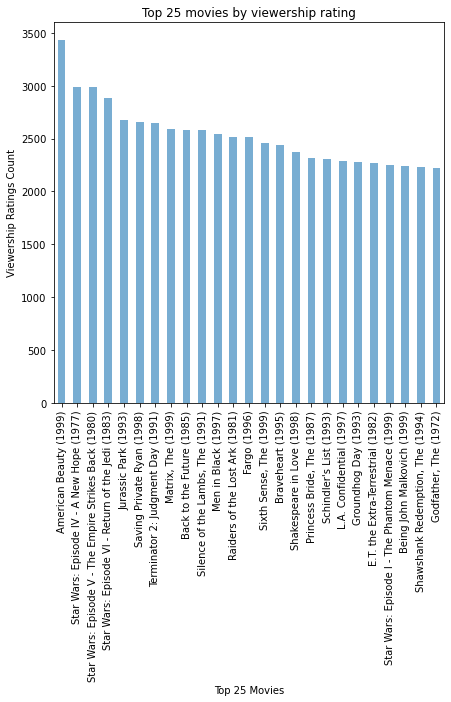

In [73]:
Top.plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.xlabel("Top 25 Movies")
plt.ylabel("Viewership Ratings Count")
plt.title("Top 25 movies by viewership rating")
plt.show()

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [74]:
userId = 2696
ByIdRating = Master[Master["UserID"] == userId]
ByIdRating

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,0,25,7,24210,...,0,0,1,0,0,1,0,0,1994,6
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,0,25,7,24210,...,0,0,1,0,0,0,0,0,1996,4
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,0,25,7,24210,...,0,0,1,0,0,1,0,0,1992,8
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,0,25,7,24210,...,0,0,0,0,1,0,0,0,1982,18
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,0,25,7,24210,...,1,0,0,0,0,0,0,0,1980,20
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,0,25,7,24210,...,0,0,0,0,1,0,0,0,1985,15
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,0,25,7,24210,...,0,0,1,0,0,0,0,0,1997,3
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,0,25,7,24210,...,0,0,1,0,0,1,0,0,1997,3
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,0,25,7,24210,...,0,0,1,0,0,1,0,0,1997,3
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,0,25,7,24210,...,1,0,1,0,0,1,0,0,1997,3


Feature Engineering  ->
 Use column genres:

Find out all the unique genres

In [35]:
Uniquegenres = Master['Genres'].str.split("|")


In [36]:
Uniquegenres

0                    [Animation, Children's, Comedy]
1          [Animation, Children's, Musical, Romance]
2                                            [Drama]
3               [Action, Adventure, Fantasy, Sci-Fi]
4                                       [Drama, War]
                             ...                    
1000204                            [Drama, Thriller]
1000205                   [Comedy, Horror, Thriller]
1000206                            [Comedy, Romance]
1000207                           [Action, Thriller]
1000208                              [Action, Drama]
Name: Genres, Length: 1000209, dtype: object

In [37]:
listGenres = set()
for genre in Uniquegenres:
    listGenres = listGenres.union(set(genre))

In [38]:
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

Create a separate column for each genre category

In [39]:
#...with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
OneHot = Master['Genres'].str.get_dummies("|")

In [40]:
OneHot.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [41]:
Master = pd.concat([Master,OneHot],axis=1)

In [75]:
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [44]:
Master.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Rating', 'Timestamp', 'Gender',
       'Age', 'Occupation', 'Zip-code', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'],
      dtype='object')

Determine the features affecting the ratings of any particular movie

In [76]:
Master[["title","Year"]] = Master.Title.str.extract("(.)\s\((.\d+)",expand=True)

In [78]:
Master = Master.drop(columns=["title"])
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [79]:
Master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 30 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  int32 
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

In [80]:
Master['Year'] = Master.Year.astype(int)

In [81]:
Master['Movie_Age'] = 2000 - Master.Year
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [82]:
Master['Gender'] = Master.Gender.str.replace('F','1')

AttributeError: Can only use .str accessor with string values!

In [83]:
Master['Gender'] = Master.Gender.str.replace('M','0')

AttributeError: Can only use .str accessor with string values!

In [85]:
Master['Gender'] = Master.Gender.astype(int)
Master.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7


In [88]:
Gender = Master.groupby('Gender').size().sort_values(ascending=False)[:25]
Gender

Gender
0    753769
1    246440
dtype: int64

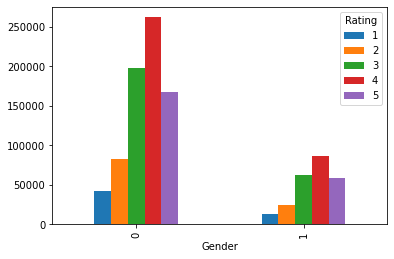

In [92]:
#Lets check and plot by Gender
Master.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

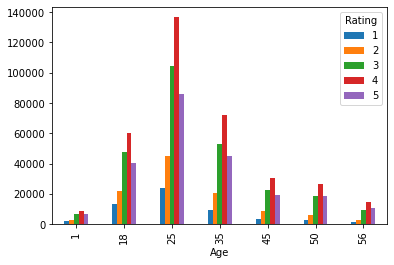

In [94]:
#Lets check and plot by age
Master.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

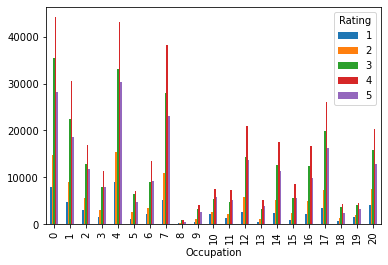

In [95]:
#Lets check and plot by occupation
Master.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

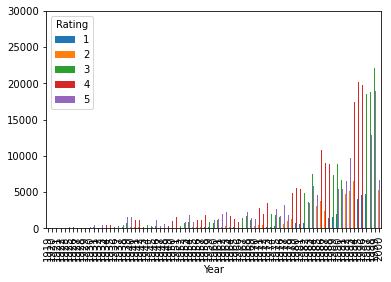

In [96]:
#Lets check and plot by year
Master.groupby(["Year","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

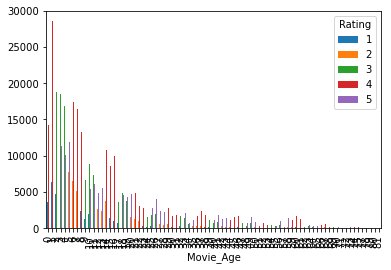

In [97]:
#Lets check and plot by Movie age
Master.groupby(["Movie_Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

Develop an appropriate model to predict the movie ratings

In [99]:
first_100 = Master[:200]

In [100]:
first_100

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Year,Movie_Age
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,1,1,10,48067,...,0,1,0,1,0,0,0,0,1995,5
2,150,Apollo 13 (1995),Drama,1,5,978301777,1,1,10,48067,...,0,0,0,0,0,0,0,0,1995,5
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,1,1,10,48067,...,0,0,0,0,1,0,0,0,1977,23
4,527,Schindler's List (1993),Drama|War,1,5,978824195,1,1,10,48067,...,0,0,0,0,0,0,1,0,1993,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1673,Boogie Nights (1997),Drama,8,5,978230356,0,25,12,11413,...,0,0,0,0,0,0,0,0,1997,3
196,1678,"Joy Luck Club, The (1993)",Drama,8,5,978230649,0,25,12,11413,...,0,0,0,0,0,0,0,0,1993,7
197,1682,"Truman Show, The (1998)",Drama,8,4,978230852,0,25,12,11413,...,0,0,0,0,0,0,0,0,1998,2
198,1693,Amistad (1997),Drama,8,3,978231121,0,25,12,11413,...,0,0,0,0,0,0,0,0,1997,3


In [101]:
A = first_100[['MovieID','Age','Occupation']].values

In [102]:
B = first_100[['Rating']].values

In [103]:
A

array([[   1,    1,   10],
       [  48,    1,   10],
       [ 150,    1,   10],
       [ 260,    1,   10],
       [ 527,    1,   10],
       [ 531,    1,   10],
       [ 588,    1,   10],
       [ 594,    1,   10],
       [ 595,    1,   10],
       [ 608,    1,   10],
       [ 661,    1,   10],
       [ 720,    1,   10],
       [ 745,    1,   10],
       [ 783,    1,   10],
       [ 914,    1,   10],
       [ 919,    1,   10],
       [ 938,    1,   10],
       [1022,    1,   10],
       [1028,    1,   10],
       [1029,    1,   10],
       [1035,    1,   10],
       [1097,    1,   10],
       [1193,    1,   10],
       [1197,    1,   10],
       [1207,    1,   10],
       [1246,    1,   10],
       [1270,    1,   10],
       [1287,    1,   10],
       [1545,    1,   10],
       [1566,    1,   10],
       [1721,    1,   10],
       [1836,    1,   10],
       [1907,    1,   10],
       [1961,    1,   10],
       [1962,    1,   10],
       [2018,    1,   10],
       [2028,    1,   10],
 

In [104]:
B

array([[5],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [3],
       [4],
       [3],
       [4],
       [4],
       [5],
       [5],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [3],
       [5],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [5],
       [4],
       [2],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
    

In [105]:
#Lets create traning and testing data set
train, test, train_labels, test_labels = train_test_split(A,B,test_size=0.33,random_state=42)

In [106]:
train

array([[2687,    1,   10],
       [1580,   25,   12],
       [1947,   50,    9],
       [ 105,   25,   12],
       [3186,    1,   10],
       [  16,   25,   12],
       [ 510,   25,   12],
       [2398,    1,   10],
       [3624,   50,    9],
       [3565,   50,    9],
       [1270,    1,   10],
       [ 150,   25,   12],
       [2469,   50,    9],
       [3534,   50,    9],
       [ 150,    1,   10],
       [1043,   50,    9],
       [2797,    1,   10],
       [1488,   25,   12],
       [1621,   25,   12],
       [1566,   50,    9],
       [ 508,   25,   12],
       [2028,    1,   10],
       [1589,   25,   12],
       [ 368,   50,    9],
       [1193,    1,   10],
       [ 161,   25,   12],
       [2506,   50,    9],
       [1961,    1,   10],
       [ 720,    1,   10],
       [1660,   25,   12],
       [ 480,   25,   12],
       [ 588,    1,   10],
       [1287,    1,   10],
       [3685,   50,    9],
       [ 527,    1,   10],
       [1907,    1,   10],
       [ 163,   25,   12],
 

In [107]:
test

array([[2082,   50,    9],
       [ 919,    1,   10],
       [1721,    1,   10],
       [ 476,   25,   12],
       [  17,   25,   12],
       [3600,   50,    9],
       [ 838,   50,    9],
       [ 650,   25,   12],
       [1027,   25,   12],
       [2791,    1,   10],
       [ 590,   50,    9],
       [1357,   25,   12],
       [ 538,   25,   12],
       [1088,   50,    9],
       [1476,   25,   12],
       [1210,   25,   12],
       [  48,   50,    9],
       [ 345,   25,   12],
       [1296,   50,    9],
       [ 597,   50,    9],
       [   1,   25,   12],
       [ 938,    1,   10],
       [ 282,   25,   12],
       [2017,   50,    9],
       [ 588,   50,    9],
       [ 364,   50,    9],
       [1441,   50,    9],
       [ 595,   50,    9],
       [   4,   25,   12],
       [  39,   25,   12],
       [ 608,    1,   10],
       [1028,    1,   10],
       [  34,   50,    9],
       [1030,   50,    9],
       [ 296,   25,   12],
       [2966,   50,    9],
       [  73,   25,   12],
 

In [108]:
train_labels

array([[3],
       [4],
       [5],
       [4],
       [4],
       [4],
       [3],
       [4],
       [4],
       [4],
       [5],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [3],
       [5],
       [4],
       [4],
       [5],
       [3],
       [3],
       [5],
       [3],
       [3],
       [5],
       [4],
       [5],
       [3],
       [5],
       [4],
       [5],
       [4],
       [3],
       [5],
       [3],
       [3],
       [5],
       [4],
       [4],
       [5],
       [3],
       [4],
       [4],
       [5],
       [4],
       [4],
       [5],
       [4],
       [5],
       [5],
       [2],
       [3],
       [4],
       [3],
       [5],
       [4],
       [3],
       [3],
       [5],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [3],
       [3],
    

In [109]:
test_labels

array([[3],
       [4],
       [4],
       [3],
       [4],
       [3],
       [4],
       [5],
       [4],
       [4],
       [3],
       [4],
       [3],
       [5],
       [3],
       [4],
       [5],
       [3],
       [3],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [4],
       [5],
       [4],
       [4],
       [5],
       [5],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [4],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [3],
       [3],
       [4],
       [4],
       [5],
       [3],
       [5],
       [3],
       [5],
       [3],
       [4],
       [3]], dtype=int64)

Predicting with ML

In [116]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
log = round(logreg.score(train, train_labels) * 100, 2)
log

C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


44.78

In [117]:
# Support Vector Machines

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
sv = round(svc.score(train, train_labels) * 100, 2)
sv

C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


41.79

In [118]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(train, train_labels)
Y_pred = linear_svc.predict(test)
lsvc = round(linear_svc.score(train, train_labels) * 100, 2)
lsvc

C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ajayk\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


43.28

In [119]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
rf = round(random_forest.score(train, train_labels) * 100, 2)
rf

<ipython-input-119-9169dc729bb1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train, train_labels)


100.0

In [120]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
knc = round(knn.score(train, train_labels) * 100, 2)
knc

<ipython-input-120-30e072d8abf2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(train, train_labels)


58.21

In [121]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
dt = round(decision_tree.score(train, train_labels) * 100, 2)
dt

100.0

In [122]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines',
              'Random Forest', 'Linear SVC', 
              'Decision Tree', 'K Nearest Neighbors'],
    'Score': [log, sv, rf, lsvc, dt, knc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,100.00
4,Decision Tree,100.00
5,K Nearest Neighbors,58.21
0,Logistic Regression,44.78
3,Linear SVC,43.28
1,Support Vector Machines,41.79


In [ ]:
#Conclusion: Hence, we can easily list out from above data frame that Random Forest & Decision Tree fits absolutely perfect by the score of 100.
#Thank You !!